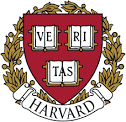

<h1 align=center><font size = 7>Harvard Tuition Project</font></h1>
<h2 align=left><font size = 5>Data Presentation</font></h2>

Our data set contains the tuitions and fees for Hardvard's undergraduates programs from 1985 to 2017.

It is composed of 3 variables :
<ul>
    <li> <b>academic.year :</b> the academic year (integer)</li>
        <li> <b>component : the components of undergaduate fees (string)</b> </li>
    <li> <b>cost:</b> the cost of the component this year (integer)</li>
</ul>

Our goal today is to study the evolution of Harvard tuition and fees through years and see which components of these fees and tuitions affect the most the cost of this prestigious college.



 <h2 align=left><font size = 5>Analysis</font></h2>

First, we import the libraries we'll need.

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import types
from botocore.client import Config
import ibm_boto3
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

Then, we load our dataset.


In [11]:
# The code was removed by Watson Studio for sharing.

,academic.year,component,cost
0,1985,Board,1925
1,1986,Board,1980
2,1987,Board,2035
3,1988,Board,2145
4,1989,Board,2145


In [47]:
df.dtypes

academic.year     int64
component        object
cost              int64
dtype: object

By looking at the head of the dataframe and at the data types, we can see that the data loaded successfully.

Our goal here is to study the evolution of Harvard's tuition through the years. As a consequence, the first thing we'll do is to look at the correlation tab and to plot the evolution of studying at Harvard to get a first idea of what is going on in our dataset . 

In [143]:
df.corr()

,academic.year,cost
academic.year,1.000000,0.316057
cost,0.316057,1.000000


Pearson correlation between academic.year and cost is closer to 0 than to 1 or -1. So according to this correlation tab, it does not seem like there is a correlation between the academic year and the cost.

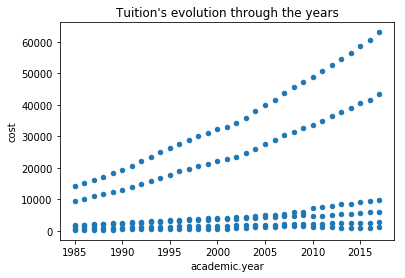

In [12]:
df.plot(x="academic.year",y="cost",kind="scatter",title="Tuition's evolution through the years")



We see on this graphic that there are several point for each year and so different curves. We know there are multiple components in our dataset. We can guess that each curves correspond to one component. Let's check it.

In [145]:
print(df.loc[df['academic.year']==1985,:])

     academic.year             component   cost
0             1985                 Board   1925
33            1985   Health Services Fee    300
66            1985                  Room   1635
99            1985  Student Services Fee    740
132           1985                 Total  14100
165           1985               Tuition   9500


Here, we see that "component" takes 6 different values : Board, Health Services Fee, Room, Student Services Fee, Total and Tuition. We also notice 6 curves appeared on the graphic which is thus coherent. To verify it, we'll create 6 different dataframes for each component and then plot cost evolution through years for each component and see if we get the exact same graphic we had earlier. It will also tell us which component affect the total cost the most.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


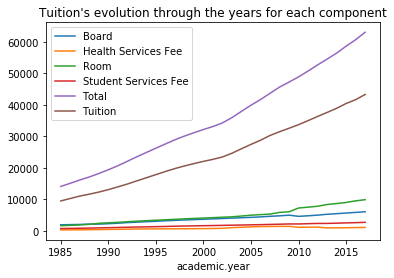

In [14]:
#Creating the dataframes
df_board = df.loc[df['component']=="Board",:]
df_HSF = df.loc[df['component']=="Health Services Fee",:]
df_room = df.loc[df['component']=="Room",:]
df_SSF = df.loc[df['component']=="Student Services Fee",:]
df_total = df.loc[df['component']=="Total",:]
df_tuition = df.loc[df['component']=="Tuition",:]

#Deleting the component's column
del df_board['component']
del df_HSF['component']
del df_room['component']
del df_SSF['component']
del df_total['component']
del df_tuition['component']

#Renaming cost's column with component's name
df_board.rename(columns={'cost':'Board'},inplace=True)
df_HSF.rename(columns={'cost':'Health Services Fee'},inplace=True)
df_room.rename(columns={'cost':'Room'},inplace=True)
df_SSF.rename(columns={'cost':'Student Services Fee'},inplace=True)
df_total.rename(columns={'cost':'Total'},inplace=True)
df_tuition.rename(columns={'cost':'Tuition'},inplace=True)


#Concatenate all the dataframes to plot them 
df_component = pd.merge(df_board,df_HSF)
df_component = pd.merge(df_component,df_room)
df_component = pd.merge(df_component,df_SSF)
df_component = pd.merge(df_component,df_total)
df_component = pd.merge(df_component,df_tuition)

#Display the new dataframe
df_component.plot(x="academic.year",title="Tuition's evolution through the years for each component")

We see here that we obtain the exact same curves we had previously. We notice that Board, Room, Student Services fee and Health Services service costs slightly increased on the contrary to the tuition cost and thus the total cost which highly increased from 1985 to 2017.

We are now going to apply a linear regression on our new dataframe to study the possible correlation between tuition fees and total cost and between the total cost and the year.

In [147]:
lm1 = LinearRegression()
lm2 = LinearRegression()

In both of our linear regresssions, we want to study the total cost, so we'll set Y (variable à expliquer) with total cost. In thefirst linear regression, LA VARIABLE EXPLICATIVE X will be set with the academic year and with Board, Room, Student Services fee, Health Services service, and Tuition costs in the second.

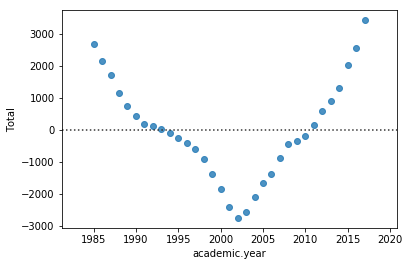

In [204]:
Y = df_component['Total']
Y2 = df_component[['Total']]
X1 = df_component['academic.year']
X2 = df_component[['Tuition','Board','Room','Health Services Fee','Student Services Fee']]

#Total cost/Academic year
sns.residplot(x="academic.year",y="Total",data=df_component)


We can see that our residuals are not spread randomly so the linear regression doesn't seem relevant in this case. However, we can see that the residuals seem to follow a second degree polynom. Let's try a polynomial regression

[ 14448.75553857  15388.1589954   16364.06924145  17376.48627673
  18425.41010125  19510.84071499  20632.77811794  21791.22231014
  22986.17329155  24217.63106219  25485.59562206  26790.06697115
  28131.04510948  29508.53003703  30922.5217538   32373.0202598
  33860.02555503  35383.53763948  36943.55651316  38540.08217606
  40173.1146282   41842.65386955  43548.69990014  45291.25271994
  47070.31232898  48885.87872724  50737.95191473  52626.53189144
  54551.61865738  56513.21221255  58511.31255695  60545.91969056
  62617.0336134 ]


Text(0.5,1,'Distribution plot of the fitted values and actual values')

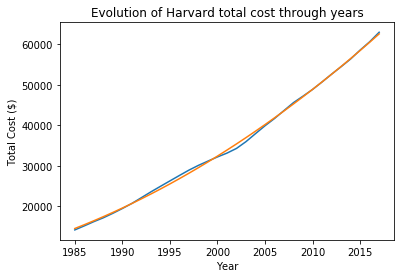

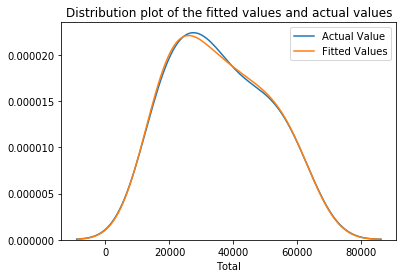

In [205]:
f = np.polyfit(X1, Y, 2)
p = np.poly1d(f)

YPred = p(X1)

plt.figure(1)
plt.plot(X1,Y,label="Actual Values")
plt.plot(X1,YPred,label="Fitted Values")

plt.title('Evolution of Harvard total cost through years')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')

plt.figure(2)
sns.distplot(Y, hist=False,label="Actual Value")
sns.distplot(YPred, hist=False, label="Fitted Values")
plt.title('Distribution plot of the fitted values and actual values')



We see on the first figure that there is a positive correlation between total cost and the academic year. The cost's increase isn't linear but polynomial. Moreover, we can tell, thanks to fitted values' courbe and distribution plot, our polynomial regression is good as, on both figure, the COURBE are almost identicals.

Let's study the influences of all the component on the total cost


Text(0.5,1,'Distribution plot of the fitted values and actual values')

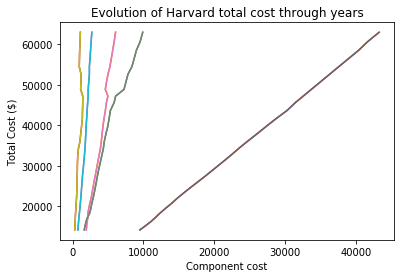

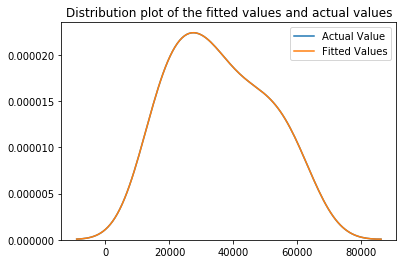

In [236]:
lm2.fit(X2,Y2)
Y2Pred = lm2.predict(X2)
plt.figure(1)
plt.plot(X2,Y2,label="Actual Values")
plt.plot(X2,Y2Pred,label="Fitted Values")

plt.title('Evolution of Harvard total cost through years')
plt.xlabel('Component cost')
plt.ylabel('Total Cost ($)')

plt.figure(2)
sns.distplot(Y2, hist=False,label="Actual Value")
sns.distplot(Y2Pred, hist=False, label="Fitted Values")
plt.title('Distribution plot of the fitted values and actual values')

On the first graphic, we see that Room, Board, Student Service Fee and Health Service Fee don't explain a lot total cost increase. We see their COURBES are almost vertical which means they didn't increase much. However, we can see the tuitions increased linearly. The more expensive tuitions were the more Harvard's total cost was as well. 

Now, we proved there are correlations between tuition fees and total cost, and total cost and academic year. We can try to predict Harvard cost for the next few years. 


In [243]:
for i in range(2018,2029):
    print( i-1,"-",i," Harvard total cost :",p(i)," $")

2017 - 2018  Harvard total cost : 64724.6543255  $
2018 - 2019  Harvard total cost : 66868.7818268  $
2019 - 2020  Harvard total cost : 69049.4161173  $
2020 - 2021  Harvard total cost : 71266.557197  $
2021 - 2022  Harvard total cost : 73520.205066  $
2022 - 2023  Harvard total cost : 75810.3597242  $
2023 - 2024  Harvard total cost : 78137.0211717  $
2024 - 2025  Harvard total cost : 80500.1894083  $
2025 - 2026  Harvard total cost : 82899.8644342  $
2026 - 2027  Harvard total cost : 85336.0462493  $
2027 - 2028  Harvard total cost : 87808.7348537  $


As a matter of a fact, this dataset has been released in 2017 and as we are in 2019 now we already have datas for the next few years. Here is a screenshot from Harvard university website showing 2018-2019 and 2019-2020 cost of attendance. The value we need to watch is Subtotal-billed costs as total billed and unbilled costs include some components we don't have in our dataset.

In 2018-2019, we found a total cost of 66 868.78 dollars and the actual value is 67 580 dollars. In 2019-2020, we predicted a total cost of 69 049.42 dollars and the actual value is 69 607 dollars. So you can see our model is pretty close to the actual price and you can refer to our predictions to determine Harvard's total cost in the next few years  with an error of $\pm$ 700 dollars.

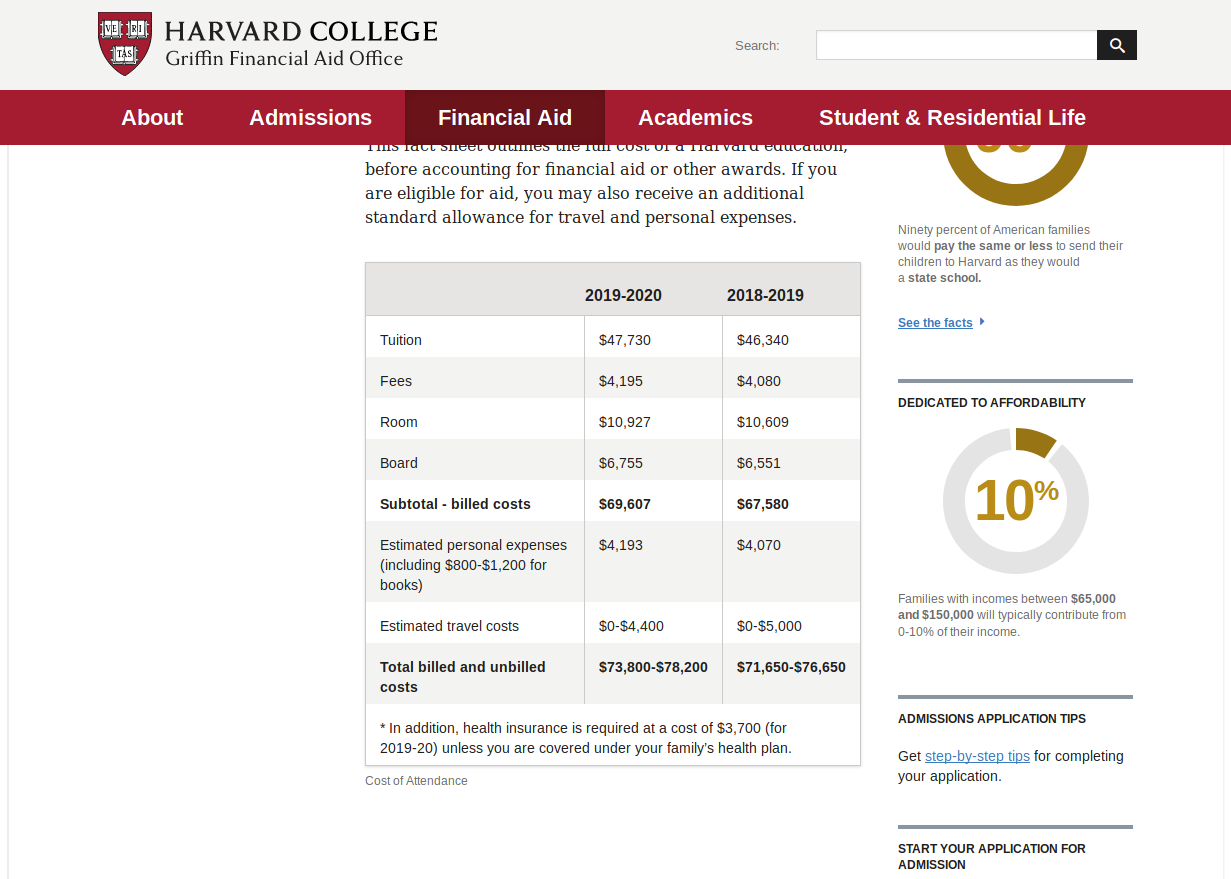

## Data citation

Harvard Financial Aid, 2015, "Harvard College Tuition", https://doi.org/10.7910/DVN/MSS2BE, Harvard Dataverse, V1, UNF:6:FyXNny+KBTgLX+DzewzEfg== [fileUNF] 